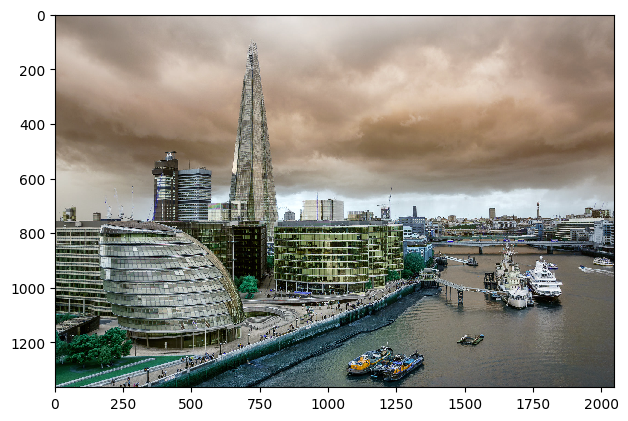

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

img = cv2.imread("assi2img.jpg")
imshow(img)


C:\Users\amitm\AppData\Local\Temp\ipykernel_25216\870067706.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0,256])


Text(0.5, 1.0, 'Original Histogram')

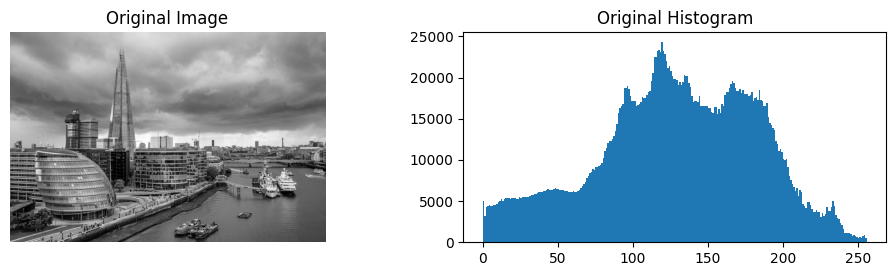

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.hist(img.ravel(), 256, [0,256])
plt.title("Original Histogram")

C:\Users\amitm\AppData\Local\Temp\ipykernel_25216\62366928.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalized.ravel(), 256, [0,256])


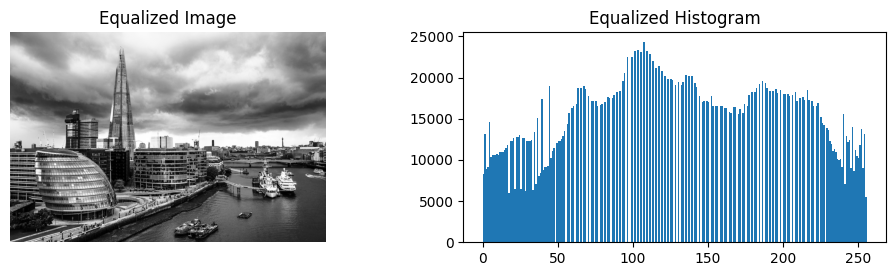

In [14]:
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(12,6))
plt.subplot(2,2,3)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(equalized.ravel(), 256, [0,256])
plt.title("Equalized Histogram")
plt.show()

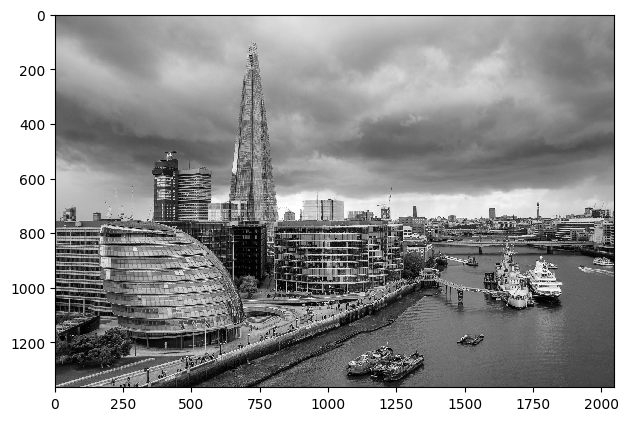

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

img = cv2.imread("assi2img.jpg", cv2.IMREAD_GRAYSCALE)
mean_filter = cv2.blur(img, (5,5))
imshow(img)


In [11]:
mean_filter = cv2.blur(img, (5,5))

gaussian_filter = cv2.GaussianBlur(img, (5,5), 1)

median_filter = cv2.medianBlur(img, 5)

In [13]:
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
r = 30  
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

low_pass = dft_shift * mask
lpf_img = np.fft.ifft2(np.fft.ifftshift(low_pass))
lpf_img = np.abs(lpf_img)

mask_high = 1 - mask
high_pass = dft_shift * mask_high
hpf_img = np.fft.ifft2(np.fft.ifftshift(high_pass))
hpf_img = np.abs(hpf_img)

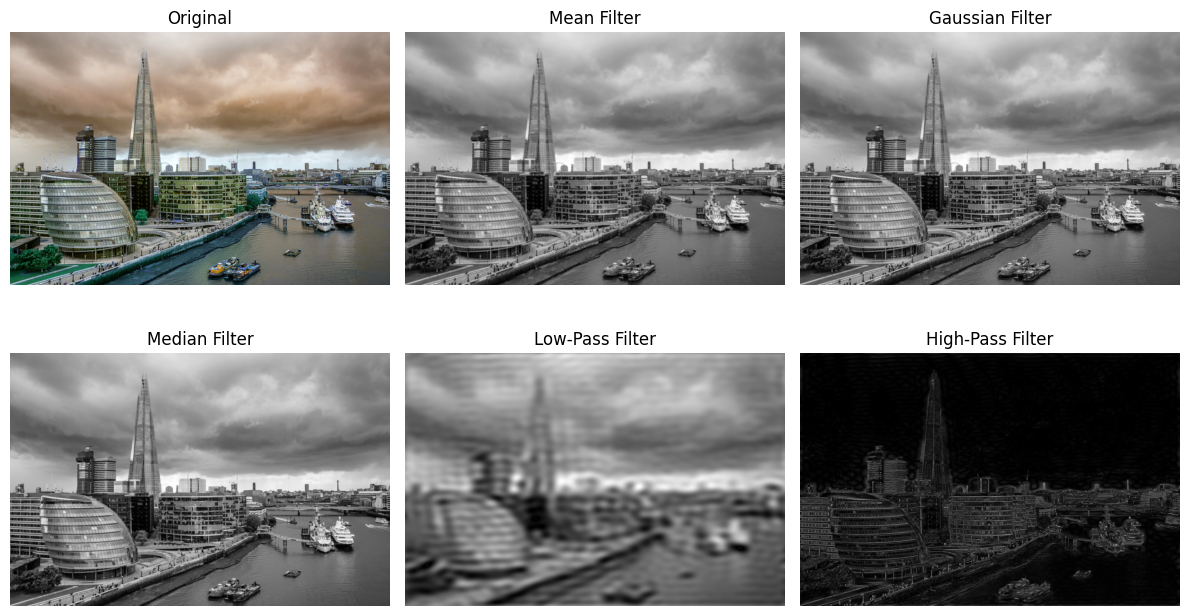

In [23]:
plt.figure(figsize=(12,10))

plt.subplot(3,3,1), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.axis("off")

# Spatial Domain
plt.subplot(3,3,2), plt.imshow(mean_filter, cmap='gray')
plt.title("Mean Filter"), plt.axis("off")

plt.subplot(3,3,3), plt.imshow(gaussian_filter, cmap='gray')
plt.title("Gaussian Filter"), plt.axis("off")

plt.subplot(3,3,4), plt.imshow(median_filter, cmap='gray')
plt.title("Median Filter"), plt.axis("off")

# Frequency Domain
plt.subplot(3,3,5), plt.imshow(lpf_img, cmap='gray')
plt.title("Low-Pass Filter"), plt.axis("off")

plt.subplot(3,3,6), plt.imshow(hpf_img, cmap='gray')
plt.title("High-Pass Filter"), plt.axis("off")

plt.tight_layout()
plt.show()